# <center> RegEx in Python</center>


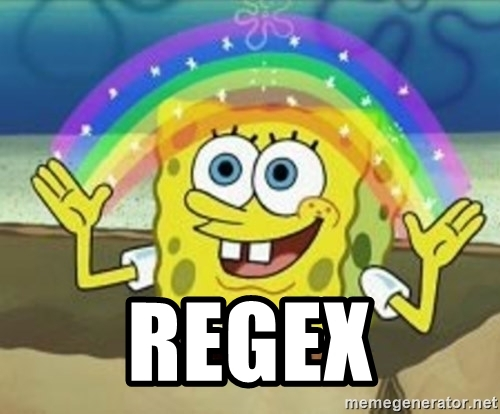

> ### *A regular expression is a sequence of characters that define a search pattern.*

# <center> 01.Introduction </center>
## 1. What exactly is a Regular Expression?

A regular expression, often called a pattern, is **an expression used to specify a set of strings** required for a particular purpose. 

- A simple way to specify a finite set of strings is to list its elements or members. <br>For example `{file, file1, file2}`. 
    

- However, there are often more concise ways to specify the desired set of strings. <br>For example, the set `{file, file1, file2}` can be specified by the pattern `file(1|2)?`. <br>We say that this pattern matches each of the three strings. [Wanna check?](https://regexr.com/48om5)

> In most formalisms, if there exists at least one regular expression that matches a particular set then there exists an infinite number of other regular expressions that also match it, i.e. **the specification is not unique**.<br>
For example, the string set `{file, file1, file2}` can also be specified by the pattern `file\d?`.




## 2. The math of Regular Expressions

- The concept of **Regular Expressions** originated from **[Regular Languages](https://en.wikipedia.org/wiki/Regular_language)**. 

- **Regular Expressions** describe **Regular Languages** in **[Formal Language Theory](https://en.wikipedia.org/wiki/Formal_language)**.

> ***Formal Language Theory***: In mathematics, computer science, and linguistics, a **formal language** consists of words whose letters are taken from an alphabet and are **well-formed according to a specific set of rules**. The field of formal language theory studies primarily the purely syntactical aspects of such languages—that is, their internal structural patterns.

> ***Regular Languages***: A regular language is a category of **formal languages** which can be expressed using a regular expression. !
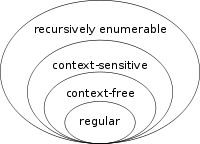
- **Note**: Today, many regular expressions engines provided by modern programming languages are augmented with features that allow recognition of languages that <span style="color:red;">**cannot**</span> be expressed by a classic regular expression!


## 3. Uses of Regular Expressions

Some important usages of regular expressions are:

- Check if an input honors a given pattern; for example, we can check whether a value entered in a HTML formulary is a valid e-mail address


- Look for a pattern appearance in a piece of text; for example, check if either the word "color" or the word "colour" appears in a document with just **one scan**


- Extract specific portions of a text; for example, extract the postal code of an address


- Replace portions of text; for example, change any appearance of "color" or "colour" with "red"


- Split a larger text into smaller pieces, for example, splitting a text by any appearance of the dot, comma, or newline characters

## 4. A brief history of Regular Expressions

> *The story begins with a neuroscientist and a logician who together tried to understand how the human brain could produce complex patterns using simple cells that are bound together.*

- In 1943, neurophysiologists ***Warren McCulloch*** and ***Walter Pitts*** published ***"A logical calculus of the ideas immanent in nervous activity"***. This paper not only represented the beginning of the regular expressions, but also proposed the first mathematical model of a neural network.


- In 1956, ***Stephen Kleene*** wrote the paper ***"Representation of events in nerve nets and finite automata"***, where he coined the terms **regular sets** and **regular expressions** and presented a simple algebra.


- In 1968, the Unix pioneer ***Ken Thompson***  took Kleene's work and extended it, publishing his studies in the paper ***"Regular Expression Search Algorithm"***. Ken Thompson's work didn't end in just writing a paper. He also implemented Kleene’s notation in the editor ***QED***. The aim was that the user could do advanced pattern matching in text files. The same feature appeared later on in the editor ***ed***.

> To search for a Regular Expression in ed you wrote `g/<regular expression>/p` The letter g meant global search and p meant print the result. The command — `g/re/p` — resulted in the standalone program grep, released in the fourth edition of Unix 1973.<br><span style="color:red;">However, **grep** didn’t have a complete implementation of regular expressions.</span>

- In 1979, ***Alfred Aho*** developed ***egrep (extended grep)*** in the seventh edition of Unix. The program egrep translated any regular expressions to a corresponding [DFA](https://en.wikipedia.org/wiki/Deterministic_finite_automaton).


- In 1987, ***Larry Wall*** created the scripting language ***Perl***. Regular Expressions are seamlessly integrated in Perl, even with its own literals. Hence, Perl pushed the regular expressions to the mainstream. The implementation in Perl went forward and added many modifications to the original regular expression syntax, creating the so-called ***Perl flavor***.

### Some other worth mentioning milestones

- The IEEE thought their POSIX standard has tried to standardize and give better Unicode support to the regular expression syntax and behaviors. This is called the ***POSIX flavor*** of the regular expressions.


- In late 1980s, ***Henry Spencer*** wrote ***"regex"***, a widely used software library for regular expressions in C programming langauge.


### Here is a brief timeline to summarize...


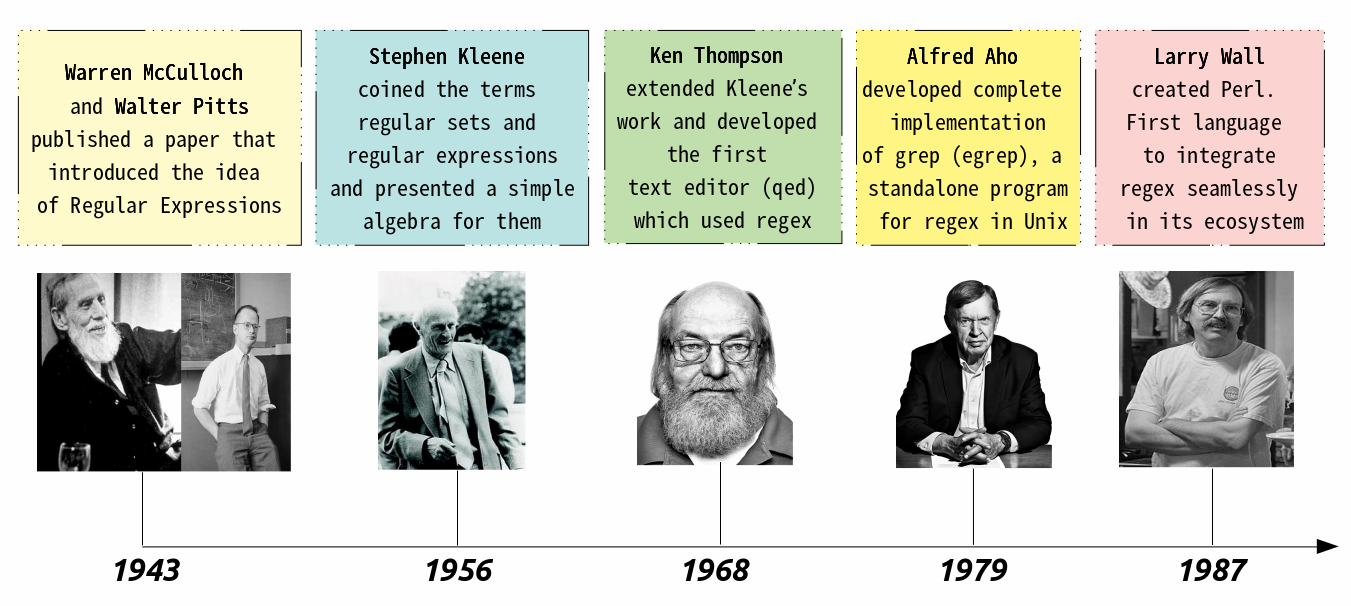

### Regex today

- It was the rise of the web that gave a big boost to the Perl implementation of regex, and that's where we get the modern syntax of regular expressions today; it really comes from Perl. `Apache`, `C`, `C++`, `the .NET languages`, `Java`, `JavaScript`, `MySQL`, `PHP`, `Python`, `Ruby` all of these are endeavoring to be Perl-compatible languages and programs. There's also a library called the `PCRE` library that stands for Perl-Compatible Regular Expression library.


- Today, the standard Python module for regular expressions—`re`—supports only Perl-style regular expressions. There is an [effort](https://pypi.python.org/pypi/regex) to write a new regex module with better POSIX style support. This new module is intended to replace Python's `re` module implementation eventually. 

## 5. Understanding the Regular Expression Syntax

A regex pattern is a simple sequence of characters. The components of a regex pattern are:

- **literals (ordinary characters)**: these characters carry no special meaning and are processed as it is.

- **metacharacters (special characters)**: these characters carry a special meaning and processed in some special way.



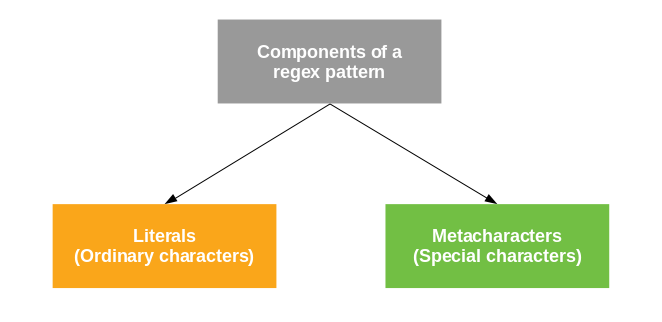

Let's start with a simple example.

Consider that we have got the list of several filenames in a folder.

```
file1.xml
file1.txt
file2.txt
file15.xml
file5.docx
file60.txt
file5.txt
```

And we want to filter out only those filenames which follow a specific pattern, i.e.  `file<one or more digits>.txt`.

> Let's try to do this on an online tool to learn, build, & test Regular Expressions (RegEx / RegExp), [RegExr](https://regexr.com).

So, the regular expression we need here is:

`file\d+\.txt`

This expression can be understood as follows:

- `file` is a substring of literals which are matched with the input as it is.

- `\d` is a metacharacter which instructs the software to match this position with a digit (0-9).

- `+` is also a metacharacter which instructs the software to match one or more iterations of the preceeding character (`\d` in this case)

- `\.` is a literal. `.` is a metacharacter but we want to use it as a literal in this case. Hence, we escape it using `\` character.

- `txt` is a substring of literals which are matched with the input as it is.




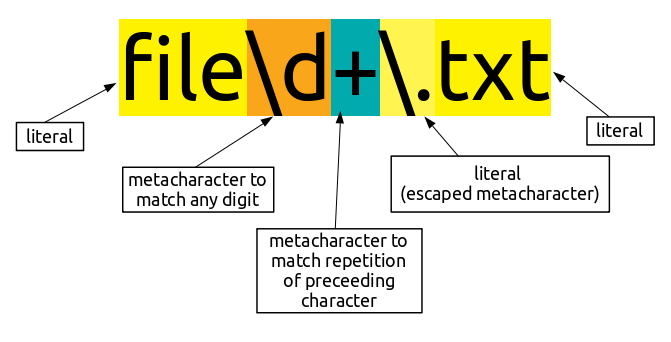

# <center>02.Getting started with RegEx in Python<center>

The **[re](https://docs.python.org/3/howto/regex.html)** module provides an interface to the regular expression engine, allowing you to **compile regular expressions into objects and then perform matches with them**.

In [1]:
import re

## 1. Compiling Regular Expressions

Regular expressions are **compiled** into `Pattern` objects, which have methods for various operations such as searching for pattern matches or performing string substitutions.


### `re.compile(pattern, flags=0)`

Compile a regular expression pattern, returning a pattern object.

- The regular expression is passed to `re.compile()` as a **string**. 

> Regular expressions are handled as strings because regular expressions aren’t part of the core Python language, and no special syntax was created for expressing them. 

> Regular expression patterns are compiled into a series of bytecodes which are then executed by a matching engine written in C.

In [6]:
pattern = re.compile("hello")

In [7]:
pattern

re.compile(r'hello', re.UNICODE)

In [8]:
type(pattern)

_sre.SRE_Pattern

- `re.compile()` also accepts an optional `flags` argument, used to enable various special features and syntax variations. [More about flags](http://xahlee.info/python/python_regex_flags.html)

<br>

In the example below, we use the flag `re.I` (short for `re.IGNORECASE`) to ignore letter case in the regex pattern.

> Hello

> HELLo

> hello

In [3]:
pattern = re.compile("hello", flags=re.I)

In [4]:
pattern

re.compile(r'hello', re.IGNORECASE|re.UNICODE)

In [5]:
type(pattern)

_sre.SRE_Pattern

## 2. Performing Matches

So, we have created a `Pattern` object representing a compiled regular expression using `re.compile()` method.

Pattern objects have several methods and attributes.

Here is the list of different methods used for performing matches:


<table style="border: 1px solid black; font-size:15px;">
<thead>
    <th>Method/Attribute</th>
    <th>Purpose</th>
</thead>
    
<tbody>
<tr>
    <td>match()</td>
    <td>Determine if the RE matches at the beginning of the string.</td>
</tr>
    
<tr>
    <td>search()</td>
    <td>Scan through a string, looking for any location where this RE matches.</td>
</tr>

<tr>
    <td>findall()</td>
    <td>Find all substrings where the RE matches, and returns them as a list.</td>
</tr>

<tr>
    <td>finditer()</td>
    <td>Find all substrings where the RE matches, and returns them as an iterator.</td>
</tr>
</tbody>
</table>

Let us go through them one by one:

### `match(string[, pos[, endpos]])`

- A match is checked only at the beginning (by default).

- Checking starts from `pos` index of the string. (default is 0)

- Checking is done until `endpos` index of string. `endpos` is set as a very large integer (by default).

- Returns `None` if no match found.

- If a match is found, a `Match` object is returned, containing information about the match: where it starts and ends, the substring it matched, and more.

In [9]:
pattern = re.compile("hello")

In [10]:
match = pattern.match("hello world")

In [11]:
type(match)

_sre.SRE_Match

In [13]:
match.span()

(0, 5)

In [14]:
match.start()

0

In [15]:
match.end()

5

In [11]:
pattern.match("say hello", pos=4) is None

False

In [12]:
pattern.match("hello", endpos=4) is None

True

### `search(string[, pos[, endpos]])`

- A match is checked throughtout the string.

- Same behaviour of `pos` and `endpos` as the `match()` function.

- Returns `None` if no match found.

- If a match is found, a `Match` object is returned.

In [13]:
pattern.search("say hello")

<_sre.SRE_Match object; span=(4, 9), match='hello'>

In [14]:
pattern.search("say hello hello")

<_sre.SRE_Match object; span=(4, 9), match='hello'>

### `findall(string[, pos[, endpos]])`

- Finds **all non-overlapping substrings** where the match is found, and returns them as a list.

- Same behaviour of `pos` and `endpos` as the `match()` and `search()` function.

In [15]:
pattern.findall("say hello hello")

['hello', 'hello']

In [16]:
pattern = re.compile("\d")
pattern.findall("1 2 3 4 5 Abcdef5384")

['1', '2', '3', '4', '5', '5', '3', '8', '4']

### `finditer(string[, pos[, endpos]])`

- Finds **all non-overlapping substrings** where the match is found, and returns them as an iterator of the `Match` objects.

- Same behaviour of `pos` and `endpos` as the `match()`, `search()` and `findall()` function.

In [17]:
pattern = re.compile("hello")

In [18]:
matches = pattern.finditer("say hello hello")

In [19]:
type(matches)

callable_iterator

In [20]:
next(matches)

<_sre.SRE_Match object; span=(4, 9), match='hello'>

In [21]:
next(matches)

<_sre.SRE_Match object; span=(10, 15), match='hello'>

In [22]:
next(matches)

StopIteration: 

In [24]:
pattern = re.compile("hello")
matches = pattern.finditer("say hello hello")
for match in matches:
    print(match.span())

(4, 9)
(10, 15)


In [18]:
from utils import highlight_regex_matches
highlight_regex_matches(pattern, "say hello hello")

say hello hello


> By now, you must have noticed that `match()`, `search()` and `finditer()` return `Match` object(s) where as `findall()` returns a list of strings.


### Note:

It is not mandatory to create a `Pattern` object explicitly using `re.compile()` method in order to perform a regex operation.

You can direclty use the module level functions such as:
- `re.match(pattern, string, flags=0)`

- `re.search(pattern, string, flags=0)`

- `re.findall(pattern, string, flags=0)`

- `re.finditer(pattern, string, flags=0)`

and so on.

In a module level function, you can simply pass a **string** as your **regex pattern** as shown in the examples below.

In [19]:
re.match("hello", "hello")

<_sre.SRE_Match object; span=(0, 5), match='hello'>

In [20]:
re.findall("hello", "say hello hello")

['hello', 'hello']

### Important Example

Consider the example below:

In [21]:
txt = "This book costs $15."

Search for the pattern `$15`.

In [22]:
pattern = re.compile("$15")

In [23]:
pattern.search(txt)

### No match found. Why?

`$` is a metacharacter and has a special meaning for regex engine. Here, we want to treat it like a literal.

In order to treat a metacharacter like a literal, you need to **escape** it using `\` character.

In [24]:
pattern = re.compile("\$15")

In [25]:
pattern.search(txt)

<_sre.SRE_Match object; span=(16, 19), match='$15'>

In regular expressions, there are twelve metacharacters that should be escaped if they are to be used with their literal meaning:

- Backslash `\`
- Caret `^`
- Dollar sign `$`
- Dot `.`
- Pipe symbol `|`
- Question mark `?`
- Asterisk `*`
- Plus sign `+`
- Opening parenthesis `(`
- Closing parenthesis `)`
- Opening square bracket `[`
- The opening curly brace `{`

# <center>03.Character Classes<center>

- The **character classes** (also known as **character sets**) allow us to define a character that will match if any of the defined characters on the set is present.


- To define a character class, we should use the opening square bracket metacharacter `[`, then any accepted characters, and finally close with a closing square bracket `]`.

### Example 1

Consider an example below where we have messed up between `license` and `licence` spellings and want to find all occurances of `license`/`licence` in the text.

In [3]:
import re
from utils import highlight_regex_matches

In [4]:
txt = """
Yesterday, I was driving my car without a driving licence. The traffic police stopped me and asked me for my 
license. I told them that I forgot my licence at home. 
"""

In [5]:
pattern = re.compile("licen[cs]e")

In [6]:
pattern.findall(txt)

['licence', 'license', 'licence']

In [5]:
highlight_regex_matches(pattern, txt)


Yesterday, I was driving my car without a driving licence. The traffic police stopped me and asked me for my 
license. I told them that I forgot my licence at home. 




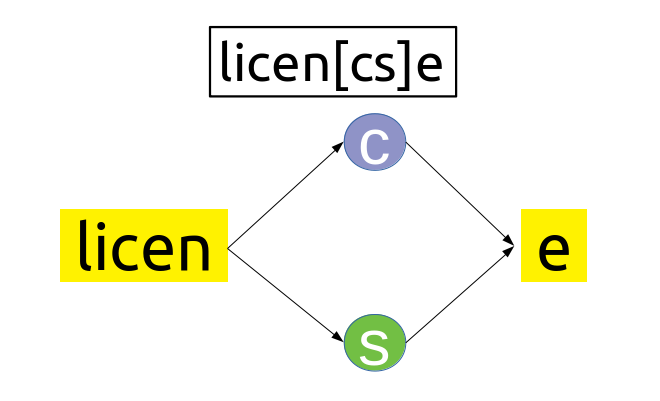

# Character Set Range

> It is possible to also use the range of a character. This is done by leveraging the hyphen symbol (-) between two related characters; for example, to match any lowercase letter we can use `[a-z]`. Likewise, to match any single digit we can define the character set `[0-9]`.

Let us consider an example in which we want to retrieve all the years from the given text.

>`[0-9]`

>`[a-z]`

>`[A-Z]`

>`[a-zA-z0-9]`

>`[A-E]`

In [7]:
txt = """
The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.
"""

In [7]:
pattern = re.compile("[1-9][0-9][0-9][0-9]")

In [8]:
pattern.findall(txt)

['2008', '2009', '2018', '2010', '2011', '2013', '2015', '2017']

In [9]:
highlight_regex_matches(pattern, txt)


The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.



### Negation of ranges
> There is another possibility—the negation of ranges. We can invert the meaning
of a character set by placing a caret (`^`) symbol right after the opening square
bracket metacharacter (`[`).

For example, to find all the characters used in a text except vowels, we can use the pattern:

> `[^A-Z]` Charecters should not be between A to Z

> `[^A-Z0-9]` Charecters should not be between A to Z and 0 to 9

In [9]:
pattern = re.compile("[^aeiou]")

In [12]:
print("".join(pattern.findall(txt)))


Th frst ssn f Indn Prmr Lg (IPL) ws plyd n 2008. 
Th scnd ssn ws plyd n 2009 n Sth Afrc. 
Lst ssn ws plyd n 2018 nd wn by Chnn Spr Kngs (CSK).
CSK wn th ttl n 2010 nd 2011 s wll.
Mmb Indns (MI) hs ls wn th ttl 3 tms n 2013, 2015 nd 2017.



# Predefined Character Classes

There exist some predefined character classes which can be used as a shortcut for some frequently used classes.


<table style="border: 1px solid black; font-size:15px;">
<thead>
    <th>Element</th>
    <th>Description</th>
</thead>
    
<tbody>
<tr>
    <td>.</td>
    <td>This element matches any character except newline</td>
</tr>

<tr>
    <td>\d</td>
    <td>This matches any decimal digit; this is equivalent to the class [0-9]</td>
</tr>

<tr>
    <td>\D</td>
    <td>This matches any non-digit character; this is equivalent to the class [^0-9]</td>
</tr>

<tr>
    <td>\s</td>
    <td>This matches any whitespace character; this is equivalent to the class
[ \t\n\r\f\v]</td>
</tr>

<tr>
    <td>\S</td>
    <td>This matches any non-whitespace character; this is equivalent to the class
[^ \t\n\r\f\v]</td>
</tr>

<tr>
    <td>\w</td>
    <td>This matches any alphanumeric character; this is equivalent to the class
[a-zA-Z0-9_]</td>
</tr>
    
<tr>
    <td>\W</td>
    <td>This matches any non-alphanumeric character; this is equivalent to the
class [^a-zA-Z0-9_]</td>
</tr>
</tbody>
</table>


Now, we can improve our pattern to find years in a given text a bit:

In [13]:
pattern = re.compile("[1-9][0-9][0-9][0-9]")
pattern.findall(txt)

['2008', '2009', '2018', '2010', '2011', '2013', '2015', '2017']

In [12]:
pattern = re.compile("[1-9]\d\d\d")

In [13]:
pattern.findall(txt)

['2008', '2009', '2018', '2010', '2011', '2013', '2015', '2017']

Let us try to find out all special symbols (non-alphanumeric, non-whitespace characters) in our text now.

In [14]:
re.findall("[^\w\s]", txt)

['(', ')', '.', '.', '(', ')', '.', '.', '(', ')', ',', '.']

# <center>04.The Backslash Plague<center>

Let's start with an example.

Consider a text containing some Windows style directory addresses in which we have to find `C:\Windows\System32` substring.

In [3]:
import re

In [4]:
txt = """
C:\Windows
C:\Python
C:\Windows\System32
"""

In [5]:
pattern = re.compile("C:\Windows\System32")

In [6]:
pattern.search(txt)

In [7]:
pattern.search(txt) == None

True

### Why are no matches found for above pattern?

Regex Engine is treateing `\` as metacharacters, whereas we intend to treat it like a literal.

### Solution???

We need to escape the metacharacters. A metacharacter can be escaped by putting a `\` before it.

In [8]:
pattern = re.compile("C:\\Windows\\System32")

In [9]:
pattern.search(txt)

In [11]:
pattern.search(txt) == None

True

In [10]:
print("C:\\Windows\\System32")

C:\Windows\System32


In [12]:
print("hello\nworld")

hello
world


### Still no match found. Why???

`\` is used as an escape at two different levels. 

- First, the Python interpreter itself performs substitutions for `\` before the `re` module ever sees the pattern string. For instance, `\n` is converted to a newline character, `\t` is converted to a tab character, etc. 

- Finally, `re` reads the substituted pattern string and will apply its own substitutions for `\` character. 

Hence, to use `\` as a **literal**, we first escape `\` with `\\` for python interpreter and then escape `\\` as `\\\\` for regex engine.

In [14]:
print("C:\\\\Windows\\\\System32")

C:\\Windows\\System32


In [8]:
pattern = re.compile("C:\\\\Windows\\\\System32")

In [9]:
pattern.search(txt)

<_sre.SRE_Match object; span=(22, 41), match='C:\\Windows\\System32'>

### Can we use 2 backslashes instead of 4 here?

Yes. By using **raw-strings**, we do not need to put escapes at first level. 

> Python raw strings are represented as ***r"your string"***. In raw strings, no escaping is required as escape sequences like `\n`, `\t`, etc are not processed.

### Raw String r'

In [15]:
print("hello\nWorld")

hello
World


In [16]:
print(r"hello\nWorld")

hello\nWorld


### So by using the Concept of Raw String r' , we can overcome the problem of Python interpreter

### So now we can give two backslahes to find a backslash

### Why two \\\ ?
### Because In RegEx Backslash is considered as meta Charecter . In order to avoid backslash as a meta Charecter. We use one more backslash

### `\\` : It will be considered as a Single Literal backslash , But not meta charecter

In [10]:
pattern = re.compile(r"C:\\Windows\\System32")

In [11]:
pattern.search(txt)

<_sre.SRE_Match object; span=(22, 41), match='C:\\Windows\\System32'>

### Do we really need to use 2 backslashes?

If you are **not using any metacharacters** in your regex pattern, you can use `re.escape()` method to escape all the characters in pattern except ASCII letters, numbers and '_'.

In [17]:
re.escape("C:\Windows\System32")

'C\\:\\\\Windows\\\\System32'

In [13]:
re.search(re.escape("C:\Windows\System32"), txt)

<_sre.SRE_Match object; span=(22, 41), match='C:\\Windows\\System32'>

# <center>05.Alteration<center>

Just like character classes are used to match a single character out of several possible characters, **alternation** is used to match a single regular expression out of several possible regular expressions.

This is accomplished using the pipe symbol `|`.

Consider a scenario where you want to find all occurances of `and`, `or`, `the` in a given text.

> One way is to write and execute 3 separate regular expressions. Using alteration, it can be done in a single regular expression!

In [1]:
import re

In [2]:
txt = """
the most common conjunctions are and, or and but.
"""

In [3]:
pattern = re.compile("and|or|the")

In [4]:
pattern.findall(txt)

['the', 'and', 'or', 'and']

In [5]:
from utils import highlight_regex_matches
highlight_regex_matches(pattern, txt)


the most common conjunctions are and, or and but.



Consider one more example now in which we want to search the substrings `What is` and `Who is`.

In [6]:
txt = """
What is your name?
Who is that guy?
"""

In [7]:
pattern = re.compile("What|Who is")

In [8]:
highlight_regex_matches(pattern, txt)


What is your name?
Who is that guy?



`What|Who is` regex pattern actually matches substrings `What` and `Who is`.

To get the desired result, we need to wrap the optional regular expressions using **paranthesis**.

In [9]:
pattern = re.compile("(What|Who) is")

In [10]:
highlight_regex_matches(pattern, txt)


What is your name?
Who is that guy?



# <center>06.Quantifiers<center>

**Quantifiers** are the mechanisms to define how a **character**, **metacharacter**, or **character set** can be **repeated**.

Here is the list of 4 basic quantifers:

<table style="border: 1px solid black; font-size:15px;">
<thead>
    <th>Symbol</th>
    <th>Name</th>
    <th>Quantification of previous character</th>
</thead>
    
<tbody>
<tr>
    <td>?</td>
    <td>Question Mark</td>
    <td>Optional (0 or 1 repetitions)</td>
</tr>
    
<tr>
    <td>*</td>
    <td>Asterisk</td>
    <td>Zero or more times</td>
</tr>

<tr>
    <td>+</td>
    <td>Plus Sign</td>
    <td>One or more times</td>
</tr>

<tr>
    <td>{n,m}</td>
    <td>Curly Braces</td>
    <td>Between n and m times</td>
</tr>
</tbody>
</table>


Let us go through different examples to understand them one by one.

### Example 1

Find all the matches for `dog` and `dogs` in the given text.

In [2]:
import re

In [3]:
txt = """
I have 2 dogs. One dog is 1 year old and other one is 2 years old. Both dogs are very cute! 
"""

### Problem with alteration:

In [4]:
pattern = re.compile("dog|dogs")
pattern.findall(txt)

['dog', 'dog', 'dog']

In [5]:
from utils import highlight_regex_matches
highlight_regex_matches(pattern, txt)


I have 2 dogs. One dog is 1 year old and other one is 2 years old. Both dogs are very cute! 



### By using Alteration
### Dogs is also identified as Dog

### So we got with Quatifiers
### dogs? : `?` means `s` can be Optional[0 or 1 repetitions]

In [7]:
pattern = re.compile("dogs?")

In [8]:
pattern.findall(txt)

['dogs', 'dog', 'dogs']

In [9]:
from utils import highlight_regex_matches
highlight_regex_matches(pattern, txt)


I have 2 dogs. One dog is 1 year old and other one is 2 years old. Both dogs are very cute! 



### Example 2

Find all filenames starting with `file` and ending with `.txt` in the given text.

In [14]:
txt = """
file1.txt
file_one.txt
file.txt
fil.txt
file.xml
file-1.txt
"""

In [18]:
pattern = re.compile("file\w*\.txt")
pattern.findall(txt)

['file1.txt', 'file_one.txt', 'file.txt']

In [19]:
highlight_regex_matches(pattern, txt)


file1.txt
file_one.txt
file.txt
fil.txt
file.xml
file-1.txt



In [15]:
pattern = re.compile("file[\w-]*\.txt")

In [16]:
pattern.findall(txt)

['file1.txt', 'file_one.txt', 'file.txt', 'file-1.txt']

In [17]:
highlight_regex_matches(pattern, txt)


file1.txt
file_one.txt
file.txt
fil.txt
file.xml
file-1.txt



### Example 3

Find all filenames starting with `file` followed by 1 or more digits and ending with `.txt` in the given text.

In [10]:
txt = """
file1.txt
file_one.txt
file09.txt
fil.txt
file23.xml
file.txt
"""

In [11]:
pattern = re.compile("file\d+\.txt")

In [12]:
pattern.findall(txt)

['file1.txt', 'file09.txt']

In [13]:
highlight_regex_matches(pattern, txt)


file1.txt
file_one.txt
file09.txt
fil.txt
file23.xml
file.txt



We can use the curly brackets syntax here with these modifications:

<table style="border: 1px solid black; font-size:15px;">
<thead>
    <th>Syntax</th>
    <th>Description</th>
</thead>
    
<tbody>
<tr>
    <td>{n}</td>
    <td>The previous character is repeated exactly n times.</td>
</tr>
    
<tr>
    <td>{n,}</td>
    <td>The previous character is repeated at least n times.</td>
</tr>

<tr>
    <td>{,n}</td>
    <td>The previous character is repeated at most n times.</td>
</tr>

<tr>
    <td>{n,m}</td>
    <td>The previous character is repeated between n and m times (both inclusive).</td>
</tr>
</tbody>
</table>

### Example 4

Find years in the given text.


In [20]:
txt = """
The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.
"""

In [25]:
pattern = re.compile("[1-9][0-9][0-9][0-9]")
pattern.findall(txt)

['2008', '2009', '2018', '2010', '2011', '2013', '2015', '2017']

In [24]:
pattern = re.compile("\d\d\d\d")
pattern.findall(txt)

['2008', '2009', '2018', '2010', '2011', '2013', '2015', '2017']

In [21]:
pattern = re.compile("\d{4}")

In [22]:
pattern.findall(txt)

['2008', '2009', '2018', '2010', '2011', '2013', '2015', '2017']

In [23]:
highlight_regex_matches(pattern, txt)


The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.



### Example 5

In the given text, filter out all 4 or more digit numbers.

In [28]:
txt = """
123143
432
5657
4435
54
65111
"""

In [29]:
pattern = re.compile("\d{4,}")

In [30]:
re.findall(pattern, txt)

['123143', '5657', '4435', '65111']

In [31]:
pattern = re.compile("\d{1,4}")
re.findall(pattern, txt)

['1231', '43', '432', '5657', '4435', '54', '6511', '1']

### Example 6

Write a pattern to validate telephone numbers.

Telephone numbers can be of the form: `555-555-5555`, `555 555 5555`, `5555555555`

In [34]:
txt = """
555-555-5555
555 555 5555
5555555555
"""

In [35]:
pattern = re.compile("\d{3}[-\s]?\d{3}[-\s]?\d{4}")

In [36]:
pattern.findall(txt)

['555-555-5555', '555 555 5555', '5555555555']

# <center>07.Greedy Behaviour<center>

Let's consider an example.

In [1]:
import re

In [2]:
txt = """<html><head><title>Title</title>"""

In [3]:
pattern = re.compile("<.*>")

In [4]:
pattern.findall(txt)

['<html><head><title>Title</title>']

In above example, one may expect to get 4 matches, i.e. `<html>`, `<head>`, `<title>` and `</title>`. Instead, we get the longest match, i.e. `<html><head><title>Title</title>`.

This particular behaviour (to find longest match) is called **greedy** behaviour.

> The greedy behavior of the quantifiers is applied by default in the quantifiers. A greedy quantifier will try to match as much as possible to have the biggest match result possible.

# <center>07.Non-Greedy behaviour<center>

The **non-greedy** (or **reluctant**) behaviour can be requested by adding an extra question mark to the quantifier.

For example, `??`, `*?` or `+?`. 

> A quantifier marked as reluctant will behave like the exact opposite of the greedy ones. They will try to have the smallest match possible.

In [5]:
pattern = re.compile("<.*?>")

In [6]:
pattern.findall(txt)

['<html>', '<head>', '<title>', '</title>']

In [ ]:
pattern = re.compile("<.*?>")

pattern.findall(txt)

# <center>08.Boundary Matchers<center>

Consider a scenario where you want to find all occurances of `and`, `or` and `the` in the given text.

In [18]:
import re
from utils import highlight_regex_matches

In [2]:
txt = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry. 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book. 
It has survived not only five centuries, but also the leap into electronic typesetting, 
remaining essentially unchanged. 
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, 
and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.
"""

In [3]:
pattern = re.compile("and|or|the")

In [4]:
pattern.findall(txt)

['or',
 'the',
 'and',
 'or',
 'the',
 'and',
 'the',
 'and',
 'the',
 'the',
 'the',
 'or',
 'and',
 'or',
 'or']

In [5]:
highlight_regex_matches(pattern, txt)


Lorem Ipsum is simply dummy text of the printing and typesetting industry. 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book. 
It has survived not only five centuries, but also the leap into electronic typesetting, 
remaining essentially unchanged. 
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, 
and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.



There is a slight problem with the above pattern. `and`, `or`, `the` inside the words are also counted as a match where as we want to find individual strings containing `and`, `or`, `the` only.

### What is the solution?

Solution is to use this pattern:

`\b(and|or|the)\b`

where `\b` is a metacharacter that matches at a position that is called a **word boundary**. 

Such identifiers that correspond to a particular position inside of the input are called **Boundary Matchers**.

**Note:** Since `\b` is also an escape sequence for strings in Python, we need to escape it using `\`, i.e. `\\b`,  in order to treat it like a metacharacter for regex matching.

In [2]:
print("\b(and|or|the)\b")

(and|or|the)


In [ ]:
pattern = re.compile("\b(and|or|the)\b")

In [1]:
print("\\b(and|or|the)\\b")

\b(and|or|the)\b


In [6]:
pattern = re.compile("\\b(and|or|the)\\b")

In [7]:
highlight_regex_matches(pattern, txt)


Lorem Ipsum is simply dummy text of the printing and typesetting industry. 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book. 
It has survived not only five centuries, but also the leap into electronic typesetting, 
remaining essentially unchanged. 
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, 
and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.



Here is a table which shows the list of all boundary matchers available in Python:

<table style="border: 1px solid black; font-size:15px;">
<thead>
    <th>Matcher</th>
    <th>Description</th>
</thead>
    
<tbody>
<tr>
    <td>^</td>
    <td>Matches at the beginning of a line</td>
</tr>
    
<tr>
    <td>$</td>
    <td>Matches at the end of a line</td>
</tr>

<tr>
    <td>\b</td>
    <td>Matches a word boundary</td>
</tr>

<tr>
    <td>\B</td>
    <td>Matches the opposite of \b. Anything that is not a word boundary</td>
</tr>

<tr>
    <td>\A</td>
    <td>Matches the beginning of the input</td>
</tr>

<tr>
    <td>\Z</td>
    <td>Matches the end of the input</td>
</tr>
</tbody>
</table>



### `^` Matches at the start of the line

In [19]:
txt ="""hi hello
hello"""

In [20]:
import re
re.findall("^hello",txt)

[]

In [17]:
txt ="""hello
hi hello"""

In [18]:
import re
re.findall("^hello",txt)

['hello']

### `S` Matches at the End of the line

In [23]:
txt ="""hi hello
hello"""
import re
re.findall("hello$",txt)

['hello']

In [25]:
txt ="""hello
hi hello hi"""
import re
re.findall("hello$",txt)

[]

### Example 1

Consider a scenario where we want to find all the lines in the given text which **start** with the pattern `Name:`.

In [14]:
txt = """
Name:
Age: 0
Roll No.: 15
Grade: S

Name: Ravi
Age: -1
Roll No.: 123 Name: ABC
Grade: K

Name: Ram
Age: N/A
Roll No.: 1
Grade: G
"""

In [16]:
import re
pattern = re.compile("^Name: \w+")
pattern.findall(txt)

[]

In [23]:
txt = """
Name:
Age: 0
Roll No.: 15
Grade: S

Name: Ravi
Age: -1
Roll No.: 123 Name: ABC
Grade: K

Name: Ram
Age: N/A
Roll No.: 1
Grade: G
"""

In [28]:
pattern = re.compile("^Name:.*", flags=re.M)
pattern.findall(txt)

['Name:', 'Name: Ravi', 'Name: Ram']

In [29]:
highlight_regex_matches(pattern, txt)


Name:
Age: 0
Roll No.: 15
Grade: S

Name: Ravi
Age: -1
Roll No.: 123 Name: ABC
Grade: K

Name: Ram
Age: N/A
Roll No.: 1
Grade: G



In [27]:
pattern = re.compile("^Name: \w+", flags=re.M)
pattern.findall(txt)

['Name: Ravi', 'Name: Ram']

In [26]:
highlight_regex_matches(pattern, txt)


Name:
Age: 0
Roll No.: 15
Grade: S

Name: Ravi
Age: -1
Roll No.: 123 Name: ABC
Grade: K

Name: Ram
Age: N/A
Roll No.: 1
Grade: G



> `re.M` (short for `re.MULTILINE`) is a flag which is used to make begin/end `(^, $)` consider each line.

### Example 2

Find all the sentences which do not end with a full stop (`.`) in the given text.

In [11]:
txt = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s!
It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages
More recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."""

In [12]:
pattern = re.compile("^.+[^\.]$", flags=re.M)

In [13]:
pattern.findall(txt)

["Lorem Ipsum has been the industry's standard dummy text ever since the 1500s!",
 'It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages']

In [14]:
highlight_regex_matches(pattern, txt)


Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s!
It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages
More recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.


# <center>09.Split using RegEx<center>

> In almost every language, you can find the split operation in strings. The big difference is that the split in the `re` module is more powerful due to which you can use a regex. So, in this case, the string is split based on the matches of the pattern.

### `split(string[, maxsplit])`

- Every pattern object has a `split()` method which splits the input string at all positions where a match is found.

- `maxsplit` is an optional argument (default value 0) which specifies the max no. of splits that can take place. `0` value means there is no limit on the no. of splits.

- Pattern match is not included in any of the substrings obtained after splitting.

#### Example 1

Let us try to split a string to get individual lines in it.

In [1]:
import re

In [2]:
txt = """Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated."""

In [3]:
pattern = re.compile("\n")

In [4]:
pattern.split(txt)

['Beautiful is better than ugly.',
 'Explicit is better than implicit.',
 'Simple is better than complex.',
 'Complex is better than complicated.']

#### Example 2

Let us try one more example in which we want to get all the words in the given text.

In [5]:
pattern = re.compile("\W")

In [6]:
pattern.split(txt)

['Beautiful',
 'is',
 'better',
 'than',
 'ugly',
 '',
 'Explicit',
 'is',
 'better',
 'than',
 'implicit',
 '',
 'Simple',
 'is',
 'better',
 'than',
 'complex',
 '',
 'Complex',
 'is',
 'better',
 'than',
 'complicated',
 '']

In [9]:
pattern = re.compile("\W")
list(filter(lambda x : x!='' , pattern.split(txt)))

['Beautiful',
 'is',
 'better',
 'than',
 'ugly',
 'Explicit',
 'is',
 'better',
 'than',
 'implicit',
 'Simple',
 'is',
 'better',
 'than',
 'complex',
 'Complex',
 'is',
 'better',
 'than',
 'complicated']

#### Example 3

What is we want only first 3 words? We need to split only 3 times in this case, which can be done by setting the value of `maxsplit` as 3.

In [7]:
pattern.split(txt, maxsplit=3)

['Beautiful',
 'is',
 'better',
 'than ugly.\nExplicit is better than implicit.\nSimple is better than complex.\nComplex is better than complicated.']

# <center>10.Substitution<center>

Now, we are going to look at a method which will replace all the **leftmost non-overlapping occurrences** of a pattern in a given string and return the new string as result.

### `sub(repl, string[, count=0])`

- `repl` is the replacement string which gets substituted in the place of match

- `string` is the input text on which substitution takes place.

- `count` is an optional argument (default is 0) which specifies the max no. of substitutions that can take place.  0 means there is no limit on substitution count.


Let us consider a case where we want to replace all occurances of numbers with a `-` in the given text.

In [1]:
import re

In [2]:
txt = "100 cats, 23 dogs, 3 rabbits"

In [3]:
pattern = re.compile("\d+")

In [5]:
pattern.findall(txt)

['100', '23', '3']

In [6]:
len(pattern.findall(txt))

3

In [4]:
pattern.sub("-", txt)

'- cats, - dogs, - rabbits'

### `subn(repl, string[, count=0])`

- Returns the substituted string as well as the no. of substitutions.

- Can be thought of as a utility function over `sub()`.

In [5]:
pattern.subn("-", txt)

('- cats, - dogs, - rabbits', 3)

In [7]:
pattern.subn("-", txt)[0]

'- cats, - dogs, - rabbits'

In [8]:
pattern.subn("-", txt)[1]

3

# <center>11.Compilation Flags<center>

- When compiling a pattern string into a pattern object, it's possible to **modify the standard behavior of the patterns** using **Compilation Flags**.

- Multiple compilation flags can be combined using the bitwise OR "|".

Here is a list of all the complation flags:

<table style="border: 1px solid black; font-size:15px;">
<thead>
    <th>Syntax</th>
    <th>Meaning</th>
</thead>
    
<tbody>
<tr>
    <td>re.IGNORECASE or re.I</td>
    <td>ignore case.</td>
</tr>

<tr>
    <td>re.MULTILINE or re.M</td>
    <td>make begin/end boundary matchers (^, $) consider each line.</td>
</tr>

<tr>
    <td>re.DOTALL or re.S</td>
    <td>make . match newline too.</td>
</tr>

<tr>
    <td>re.UNICODE or re.U</td>
    <td>make {\w, \W, \b, \B} follow Unicode rules.</td>
</tr>

<tr>
    <td>re.LOCALE or re.L</td>
    <td>make {\w, \W, \b, \B} follow locale.</td>
</tr>

<tr>
    <td>re.ASCII or re.A</td>
    <td>make {\w, \W, \b, \B} perform ASCII-only matching.</td>
</tr>

<tr>
    <td>re.VERBOSE or re.X</td>
    <td>allow comment in regex.</td>
</tr>

<tr>
    <td>re.DEBUG</td>
    <td>get information about the compilation pattern.</td>
</tr>
</tbody>
</table>

Let's go through each one of them one by one.

## 1. re.IGNORECASE or re.I

This flag makes a regex pattern case-insensitive.


Let's check out an example to find all occurances of `the` and `The` in the given text.

In [1]:
import re
from utils import highlight_regex_matches

In [2]:
txt = """
The best thing about regex is that it makes the task of string manipulation so easy.
"""

In [3]:
pattern = re.compile("the", flags=re.I)

In [4]:
pattern

re.compile(r'the', re.IGNORECASE|re.UNICODE)

In [5]:
highlight_regex_matches(pattern, txt)


The best thing about regex is that it makes the task of string manipulation so easy.



## 2. re.MULTILINE or re.M

This flag is used to make begin/end boundary matchers (`^`, `$`) consider each line of the given text.


Let's check out an example to find all lines starting with `A`.  

In [6]:
txt = """
A man was crossing the road.
Suddenly, a car passed before him in a very high speed.
He was terrified
And shocked.
"""

In [10]:
pattern = re.compile("^A.+")
highlight_regex_matches(pattern, txt)


A man was crossing the road.
Suddenly, a car passed before him in a very high speed.
He was terrified
And shocked.



In [7]:
pattern = re.compile("^A.+", flags=re.M)

In [8]:
highlight_regex_matches(pattern, txt)


A man was crossing the road.
Suddenly, a car passed before him in a very high speed.
He was terrified
And shocked.



## 3. re.DOTALL or re.S

The `.` metacharacter matches everything except newline character. If we want to make `.` match newline too, we have to set this flag.

Let's consider an examle to match all the text after (and including) `car`.

In [9]:
pattern = re.compile("car.+")
highlight_regex_matches(pattern, txt)


A man was crossing the road.
Suddenly, a car passed before him in a very high speed.
He was terrified
And shocked.



In [9]:
pattern = re.compile("car.+", flags=re.S)

In [10]:
highlight_regex_matches(pattern, txt)


A man was crossing the road.
Suddenly, a car passed before him in a very high speed.
He was terrified
And shocked.



## 4. re.UNICODE or re.U

Using this flag, we can make the pattern characters `{\w, \W, \b, \B}` dependent on the Unicode character properties database.

> re.UNICODE is the default flag in Python 3 regex patterns.

Let's consider an example where we try to work on hindi language.

In [11]:
txt = "मुझे किताबें पढ़ना बहुत पसंद है।"

In [12]:
pattern = re.compile("\w+")

In [13]:
pattern.findall(txt)

['म', 'झ', 'क', 'त', 'ब', 'पढ', 'न', 'बह', 'त', 'पस', 'द', 'ह']

[Solution](https://stackoverflow.com/questions/12746458/python-unicode-regular-expression-matching-failing-with-some-unicode-characters/12747529#12747529)

In [14]:
import regex

In [15]:
pattern = regex.compile("\w+")

In [16]:
pattern.findall(txt)

['मुझे', 'किताबें', 'पढ़ना', 'बहुत', 'पसंद', 'है']

## 5. re.LOCALE or re.L

> A locale is a set of environmental variables that defines the language, country, and character encoding settings (or any other special variant preferences) for your applications.

This flag will make the word pattern `{\w, \W}` and boundary pattern `{\b, \B}`, dependent on the current locale. 

<span style="color:red;">**The use of this flag is discouraged in Python 3 as the locale mechanism is very unreliable, it only handles one “culture” at a time, and it only works with 8-bit locales. Unicode matching is already enabled by default in Python 3 for Unicode (str) patterns, and it is able to handle different locales/languages.**</span>


## 6. re.ASCII or re.A

This flag will make the word pattern `{\w, \W}` and boundary pattern `{\b, \B}` perform ASCII-only matching, i.e. only A-Z, a-z, 0-9 will be considered alphanumeric characters. 

Let us see an example below:

In [17]:
chars =  ''.join(chr(i) for i in range(256))

In [18]:
print(chars)

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ


In [19]:
pattern = re.compile("\w")

In [20]:
highlight_regex_matches(pattern, chars)

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ


In [21]:
pattern = re.compile("\w", flags=re.A)

In [22]:
highlight_regex_matches(pattern, chars)

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ


## 7. re.VERBOSE or re.X

This flag changes the regex syntax, to allow you to add annotations in regex. 

- Whitespace within the pattern is ignored, except when in a character class or preceded by an unescaped backslash.

- When a line contains a # neither in a character class or preceded by an unescaped backslash, all characters from the leftmost such # through the end of the line are ignored.

In [17]:
txt = """
This is a sample text123
"""

In [18]:
pattern = re.compile("\w +")

In [19]:
pattern.findall(txt)

['s ', 's ', 'a ', 'e ']

In [20]:
pattern = re.compile("\w +  # find all words", flags=re.X)

In [21]:
pattern.findall(txt)

['This', 'is', 'a', 'sample', 'text123']

## 8. re.DEBUG

This flag when set, gives some information about the compilation pattern.

In [28]:
pattern = re.compile("\b[a-e7-9]+\b", flags=re.DEBUG)

LITERAL 8
MAX_REPEAT 1 MAXREPEAT
  IN
    RANGE (97, 101)
    RANGE (55, 57)
LITERAL 8


# <center>12.Grouping<center>

> Frequently you need to obtain more information than just whether the regex pattern matched or not.

By placing part of a regular expression inside round brackets or parentheses `(`, `)`, you can **group that part** of the regex pattern together.

### Applications of grouping:

#### 1. apply a quantifier to the entire group.

For example, `(ab)+` will match one or more repetitions of `ab`.

In [1]:
import re
from utils import highlight_regex_matches

In [2]:
txt = "abbbbbabbbb"

In [3]:
pattern1 = re.compile("ab+")
pattern2 = re.compile("(ab)+")

In [4]:
highlight_regex_matches(pattern1, txt)

abbbbbabbbb


In [5]:
highlight_regex_matches(pattern2, txt)

abbbbbabbbb


#### 2. restrict alternation to part of the regex.

For example, `my name is ram|sam` will match `my name is ram` and `sam` whereas `my name is (ram|sam)` will match `my name is ram` and `my name is sam`.

In [6]:
txt = """
my name is ram
my name is sam
"""

In [7]:
pattern1 = re.compile("my name is ram|sam")
pattern2 = re.compile("my name is (ram|sam)")

In [8]:
highlight_regex_matches(pattern1, txt)


my name is ram
my name is sam



In [9]:
highlight_regex_matches(pattern2, txt)


my name is ram
my name is sam



#### 3. capture the text matched by group.

- Groups indicated with `(`, `)` also capture the **starting** and **ending** index of the text that they match.

- Groups can be retrieved by passing an argument to `group()`, `start()`, `end()`, and `span()` of the `Match` object. 

- Groups are numbered starting with `0`. 

- Group `0` is always present; it captures the whole regex pattern, so all `Match` object methods have group `0` as their default argument.

Consider an example where we want to parse a date and determine day, month and year.

In [4]:
txt = "12/02/2019" 

In [6]:
import re
pattern = re.compile("\d{2}\/\d{2}\/\d{4}")
re.findall(pattern , txt)

['12/02/2019']

In [7]:
txt = "12/02/2019" 

In [8]:
pattern = re.compile("(\d{2})\/(\d{2})\/(\d{4})")

In [9]:
match = pattern.match(txt)
match

<_sre.SRE_Match object; span=(0, 10), match='12/02/2019'>

In [10]:
# group 0: matches entire regex pattern
match.group(0)

'12/02/2019'

In [11]:
# group 1: match 1st group
match.group(1)

'12'

In [12]:
match.group(2)

'02'

In [13]:
match.group(3)

'2019'

In [14]:
match.groups()

('12', '02', '2019')

In [17]:
day, month, year = match.groups()

In [18]:
day, month, year

('12', '02', '2019')

Let's try one more example of group capturing. 

In the given text, find all the patterns with `Name: <some-name>` and extract `<some-name>`. 

In [20]:
txt = """
Name: Nikhil
Age: 0
Roll No.: 15
Grade: S

Name: Ravi
Age: -1
Roll No.: 123
Grade: K

Name: Ram
Age: N/A
Roll No.: 1
Grade: G
"""

In [21]:
pattern = re.compile("Name: (.+)\n")

In [22]:
pattern.findall(txt)

['Nikhil', 'Ravi', 'Ram']

> Parentheses cannot be used inside character classes, at least not as metacharacters. When you put a parenthesis in a character class, it is treated as a literal character. So the regex `[(a)b]` matches `a`, `b`, `(`, and `)`.

# <center>13.Backreferencing<center>

**Backreferences** in a pattern allow you to specify that the contents of an earlier capturing group must also be found at the current location in the string. 

> For example, `\1` will succeed if the exact contents of group `1` can be found at the current position, and fails otherwise.

### Example 1

Consider a scenario where we want to find all the duplicated words in the given text.

In [1]:
import re

In [2]:
txt = """
hello hello
how are you
bye bye
"""

In [1]:
print("(\w+) \1")

(\w+) 


In [2]:
print("(\w+) \\1")

(\w+) \1


In [3]:
print(r"(\w+) \1")

(\w+) \1


In [3]:
pattern = re.compile("(\w+) \\1")

In [4]:
pattern.findall(txt)

['hello', 'bye']

> Since Python’s string literals also use a **backslash followed by numbers** to allow including arbitrary characters in a string, backreferences need to be **escaped** so that regex engine gets proper format. We can also use **raw strings** to ignore escaping.

Here is an example using raw strings.

In [5]:
pattern = re.compile(r"(\w+) \1")

In [6]:
pattern.findall(txt)

['hello', 'bye']

### Example 2

Consider a scenario where we want to find all dates with the format `dd/mm/yyy` and change them to `yyyy-mm-dd` format. 

In [4]:
txt = """
today is 23/02/2019.
yesterday was 22/02/2019.
tomorrow is 24/02/2019.
"""

In [7]:
import re
pattern = re.compile("(\d{2})\/(\d{2})\/(\d{4})")

In [8]:
pattern.findall(txt)

[('23', '02', '2019'), ('22', '02', '2019'), ('24', '02', '2019')]

In [9]:
newtxt = pattern.sub(r"\3-\2-\1", txt)

In [10]:
print(newtxt)


today is 2019-02-23.
yesterday was 2019-02-22.
tomorrow is 2019-02-24.



> Backreferences, too, cannot be used inside a character class. The `\1` in a regex like `(a)[\1b]` is either an error or a needlessly escaped literal 1. 

# <center>14.Named Groups<center>

> Using numbers to refer to groups can be tedious and confusing, and the worst thing is that it doesn't allow you to give meaning or context to the group. That's why we have named groups.

Instead of referring to groups by numbers, groups can be referenced by a name. Such a group is called a **named group**.

- The syntax for a named group is one of the Python-specific extensions: `(?P<name>...)`  where `name` is, obviously, the name of the group. 

- Named groups behave exactly like capturing groups, and additionally associate a name with a group.

- Here is a table which shows three different ways to refer to named groups:
    
<table style="border: 1px solid black; font-size:15px;">
<thead>
    <th>Use</th>
    <th>Syntax</th>
</thead>
    
<tbody>
<tr>
    <td>Inside a pattern</td>
    <td>(?P=name)</td>
</tr>
    
<tr>
    <td>In the repl string of the sub operation</td>
    <td>\g&lt;name&gt;</td>
</tr>

<tr>
    <td>In any of the operations of the MatchObject</td>
    <td>match.group('name')</td>
</tr>
</tbody>
</table>

### Example 1

Consider a scenario where we want to extract the first name and last name of a person.

In [3]:
import re

In [24]:
txt = "Nikhil Kumar"

In [25]:
pattern = re.compile("(?P<first>\w+) (?P<last>\w+)")

In [26]:
match = pattern.match(txt)

In [27]:
match.group(1)

'Nikhil'

In [28]:
match.group('first')

'Nikhil'

In [29]:
match.group(2)

'Kumar'

In [30]:
match.group('last')

'Kumar'

In [31]:
match.groupdict()

{'first': 'Nikhil', 'last': 'Kumar'}

### Example 2

Now consider the scenario where we want to swap first name and last name in above example.

In [15]:
pattern.sub(r"\2 \1", txt)

'Kumar Nikhil'

In [16]:
pattern.sub("\g<last> \g<first>", txt)

'Kumar Nikhil'

### Example 3

Consider a scenario where we want to check if a person has same first and last name.

In [19]:
txt = "Jhonson Jhonson"

In [21]:
pattern = re.compile("(\w+) \\1")
pattern.findall(txt)

['Jhonson']

In [22]:
pattern = re.compile("(?P<first>\w+) (?P=first)")

In [23]:
pattern.findall(txt)

['Jhonson']

# <center>15.Non-Capturing Groups<center>

> There are cases when we want to use groups, but we're not interested in extracting the information, i.e. capturing the matched text inside paranthesis only. An example is **alteration**.

Let's consider an example where we want to find the strings `i love cats` or `i love dogs` in the given text.

In [12]:
import re

In [13]:
txt = """
i love cats
i love dogs
"""

In [14]:
pattern = re.compile("i love (cats|dogs)")

In [15]:
pattern.findall(txt)

['cats', 'dogs']

In [16]:
for match in pattern.finditer(txt):
    print("Complete regex match (default):", match.group(0))
    print("Match captured by 1st group:", match.group(1))

Complete regex match (default): i love cats
Match captured by 1st group: cats
Complete regex match (default): i love dogs
Match captured by 1st group: dogs


As we can see, the group captured part contains only `cats` or `dogs` instead of complete sentences.

Hence, to make a group **non-capturing**, we have to use the syntax `(?:pattern)`.

In [17]:
pattern = re.compile("i love (?:cats|dogs)")

In [18]:
pattern.findall(txt)

['i love cats', 'i love dogs']

In [21]:
for match in pattern.finditer(txt):
    print(match.group())

i love cats
i love dogs


In [22]:
for match in pattern.finditer(txt):
    print(match.group(0))

i love cats
i love dogs


In [23]:
for match in pattern.finditer(txt):
    print(match.group(1))

IndexError: no such group

> After using the new syntax, we have the same functionality as before, but now we're saving resources and the regex is easier to maintain. Note that the group cannot be referenced.

# <center>16.Look ahead<center>

In [7]:
import re
from utils import highlight_regex_matches

In [9]:
txt = "red green blue"
pattern = re.compile(r"\bgreen\b")
pattern.findall(txt)

['green']

# Zero-width assertions

- Characters which indicate positions rather than actual content are called **zero-width assertions**.


- For instance, the caret symbol (`^`) is a representation of the beginning of a line or the dollar sign (`$`) for the end of a line. 


- They effectively do assertion without consuming characters; they just return a positive or negative result of the match.


- A more powerful kind of **zero-width assertion** is **look around**, a mechanism with which it is possible to match a certain previous (**look behind**) or ulterior (**look ahead**) value to the current position.


# Look around


**Look around** is a simple mechanism which during the matching process, at the current position, looks forward (or behind, depends on type of lookaround used) to see if **some** pattern matches before continuing with the actual match.

The most important thing to understand here is that **look around** mechanism consists of 2 parts:
- **actual expression**: an expression whose match constitutes the final **result**.
- **non-consuming expression**: an expression whose match is evaluated before the actual expression, just to see if it can succeed. It is **not actually consumed** by the regex engine.
    - If the non-consuming match **succeeds**, the regex engine forgets about this non-consuming expression and starts evaluating the next character from the current position of the actual expression. 
    - If the non-consuming match **does not succeed**, we simply move to next character of the given text and repeat the whole match process again.

There are 2 main categories of **look around**  which, in turn, have 2 sub-categories each.

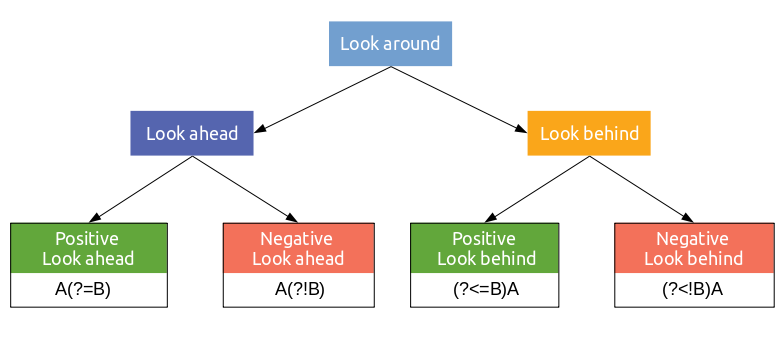

Let's explore each one of them one by one.

# Look ahead

**Look ahead** mechanism checks the match for a non-consuming expression **ahead** of a given pattern.


## Positive look ahead

- **Positive look ahead** will succeed if the passed non-consuming expression **does match** against the forthcoming input.

- The syntax is `A(?=B)` where `A` is the **actual expression** and `B` is the **non-consuming expression**. 


Let's check out an example to understand the concept. Let's assume that we want to find a match for `love` in the given text only if it is followed by `regex`.

In [10]:
import re
from utils import highlight_regex_matches

In [11]:
txt = "i love python, i love regex"

In [12]:
pattern = re.compile('love regex')

In [13]:
match = pattern.search(txt)

In [14]:
match.span()

(17, 27)

In [15]:
pattern.findall(txt)

['love regex']

In [16]:
highlight_regex_matches(pattern, txt)

i love python, i love regex


As we can see, a total of 10 (index 17 to 27) characters, i.e. `love regex` are consumed to search for the given pattern in the text.

Now consider the regex pattern `love(?=\sregex)`.

In [19]:
pattern = re.compile("love(?=\sregex)")

In [20]:
match = pattern.search(txt)

In [21]:
match.span()

(17, 21)

In [22]:
highlight_regex_matches(pattern, txt)

i love python, i love regex


Now, using **positive look ahead** mechanism, we consumed only 4 (index 17 to 21) characters are consumed for the match.

Let us check out another example to find all words in given text which are followed by `.` or `,`.

In [26]:
txt = "My favorite colors are red, green, and blue."

In [33]:
pattern = re.compile("\w+(?=,|\.)")

In [34]:
pattern.findall(txt)

['red', 'green', 'blue']

In [35]:
highlight_regex_matches(pattern, txt)

My favorite colors are red, green, and blue.


## Negative look ahead

- **Negative look ahead** will succeed if the passed non-consuming expression **does not match** against the forthcoming input.

- The syntax is `A(?!B)` where `A` is the **actual expression** and `B` is the **non-consuming expression**. 


Let's assume that we want to find a match for `love` in the given text only if it is NOT followed by `regex`.

In [36]:
txt = "i love python, i love regex"

In [37]:
pattern = re.compile("love(?!\sregex)")

In [38]:
highlight_regex_matches(pattern, txt)

i love python, i love regex


# <center>17.Look behind<center>


**Look behind** mechanism checks the match for a non-consuming expression **behind** a given pattern.


## Positive look behind

- **Positive look behind** will succeed if the passed non-consuming expression **does match** against the forthcoming input.

- The syntax is `(?<=B)A` where `A` is the **actual expression** and `B` is the **non-consuming expression**. 


Let's check out an example to understand the concept. Let's assume that we want to find a match for `regex` in the given text only if it is succeeded by `love` or `hate`.

In [1]:
import re
from utils import highlight_regex_matches

In [2]:
txt = "love regex or hate regex, can't ignore regex"

In [3]:
pattern = re.compile("(?<=(love|hate)\s)regex")

In [4]:
highlight_regex_matches(pattern, txt)

love regex or hate regex, can't ignore regex


## Negative look behind

- **Negative look behind** will succeed if the passed non-consuming expression **does not match** against the forthcoming input.

- The syntax is `(?<!B)A` where `A` is the **actual expression** and `B` is the **non-consuming expression**. 


Let's assume that we want to find a match for `regex` in the given text if it is not followed by `love` or `hate`.

In [5]:
pattern = re.compile("(?<!(love|hate)\s)regex")

In [6]:
highlight_regex_matches(pattern, txt)

love regex or hate regex, can't ignore regex
